# KTF Project Demo

> Sample submission









# Build Your Own Blog (BYOB)

We are going to have you set up your own blog and make a covid dashboard on it, which looks a bit like:

![](images/dashboard.png)

You work in this question involves:

1. setting up the blos
2. writing a notebook with a dashboard including filling in two code cells starting with:

```python
# your code here
```

to do some pandas manipulations

3. Understanding the other pandas and gridspec code used
4. Putting your notebook on the blog
5. OPTIONAL AND EXTRA CREDIT: downloading new data every day and updating the dashboard using github actions

### Why you **must** blog about your work

For a data scientist, your projects are *more important* than any certification.

Read this fantastic post by Jeremy Howard, founder of [fast.ai](https://www.fast.ai/) about the [importance of blogging](https://www.fast.ai/2020/01/16/fast_template/).

Nowadays, setting up your blog is not too difficult, but it can get a little unwieldy. 

We want you to quickly get online, so that you can share your work with friends, professors (& recruiters).

So in the first part of the exercise, you will:

1. **Set up your own custom data science blog**
2. **Make your own custom covid19 dashboard**
3. **Publish your dashboard on your newly minted blog**

## 1.1 - Setting up your custom blog live!

There are several options to build a data science blog, with *Jekyll* & *Hugo* being the most popular static-site generators.

But we recommend that you build your blog using [fastpages](https://fastpages.fast.ai/), a powerful static site generator built on top of Jekyll & Github Actions that can render your jupyter notebooks online, without too much effort.

We're sure you will love it, so for this homework, we want you to build one for yourself, even if you may have your own customized blog already made.


### FastPages

- Follow build instructions [here](https://fastpages.fast.ai/)
- If you're more of a video person, follow video instructions [here](https://www.youtube.com/watch?v=L0boq3zqazI)

If you follow the build instructions correctly, we expect you to have a github repo with all the files necessary to keep your blog live.

**Tip** : Make sure you clone your blog repo to your local machine. We may need it to modify it later.

At this point, **please make sure to send the URL of your blog repo to submissions@univ.ai .** In this email include your univ.ai id. We will use it you grade you as well as give you instructions to set up on github a custom `univai_username.posts.ai` site for your blogs.

Your blog will look something like [this](http://gensectimes.com/BargainBlog/)



## 1.2 - Making your custom covid19 dashboard

### Covid-19 Dashboard - India

Covid19 cases have exponentially grown in India since the first 100 cases on ```14th March 2020```.

Tracking covid19 in India is a difficult task because of India's population. 

Even the most popular dashboard by [Johns Hopkins](https://coronavirus.jhu.edu/map.html) only covers data for India at the national level.

The goal of this exercise is to make your own custom statelevel dashboard for ```cases``` & ```deaths```.

The idea is to use simple python libraries ```pandas``` & ```matplotlib``` to make basic, but demonstrative plots.

We have provided for you two files.

- SnapshotCases-28-July.csv
- SnapshotDeaths-28-July.csv

Both contain statewise cumulative counts for each day since ```14-Mar-2020```, thanks to the helpful people at [covid19india.org](https://www.covid19india.org/)

First create a new notebook somewhere, which will map to a single blog post on your blog. (Fastpages makes it very easy to convert jupyter notebooks to blog posts).

Do you see the `#hide` at the top of the cell below? This means, that on a blog page, that cell will not be displayed. Use such an annotation on those cells you dont want displayed in your blog post.

There are lots pf python cells that are useful below.  Use this helper code below to get started. Copy this notebook into a new file and start editing it. You will need to fill in the code cells labelled thus:

```
# your code here

```


In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')

In [3]:
dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
3,Assam,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
4,Bihar,0,0,0,0,0,0,0,0,2,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


**Note that the numbers of cases and deaths for each day in both of these dataframes are cumulative numbers.**

### Take a look at the dataset
It has the **cumulative** number of cases & deaths for each data starting ```14-Mar-20```

We need two columns of data, with the following variable names from the above data:

1. `dt_today` : coulumn for Latest date (28 July)
2. `dt_yday` : column for Date before (27 July)

In [5]:
# your code here 
dt_today = dft_cases.columns.to_list()[-1]
dt_yday = dft_cases.columns.to_list()[-2]

We also need 4 pandas series:

1. dfc_cases :Total number of current cases in each state
2. dfc_deaths : Total number of current deaths in each state
3. dfp_cases : Total number of cases a day before in each state
4. dfp_deaths : Total number of deaths a day before in each state

In [8]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_deaths.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

### Make a new dataframe 

The dataframe variable should be named `df_table`.

This table will summarize the situation for each state with the following column names:

1. 'Cases',
2. 'Deaths',
3. 'PCases',
4. 'PDeaths'

which correspond to the series defined above.

The dataframe should be ordered by highest cases first and then highest deaths (pandas `df.sort_values(sort_values(by = ['Cases','Deaths'], ascending = [False, False])`)

After you construct the dataframe, reset the index (`reset_index` in pandas) so that the index is just numbers (like usual python indices).


In [33]:
# your code here

df_table = pd.DataFrame({'Cases':dft_cases.set_index('states')[dt_today],'Deaths': dft_deaths.set_index('states')[dt_today],
                       'PCases' :dft_cases.set_index('states')[dt_yday],'PDeaths':dft_deaths.set_index('states')[dt_yday]})
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending=[False,False]).reset_index()

In [34]:
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,391440,14164,383723,13882
1,Tamil Nadu,227688,3659,220716,3571
2,Delhi,132275,3881,131219,3853
3,Andhra Pradesh,110297,1148,102349,1090
4,Karnataka,107001,2064,101465,1962


We add three more columns to df_table:

1. Number of additional cases since yesterday
2. Number of additional deaths since yesterday
3. Current case fatality rate for each state

In [35]:
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [36]:
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,391440,14164,383723,13882,7717,282,3.62
1,Tamil Nadu,227688,3659,220716,3571,6972,88,1.61
2,Delhi,132275,3881,131219,3853,1056,28,2.93
3,Andhra Pradesh,110297,1148,102349,1090,7948,58,1.04
4,Karnataka,107001,2064,101465,1962,5536,102,1.93


Your table should look something like below:

![](images/df.png)

### Now we make a dictionary with a handy summary of high-level data

In this dictionary, accesible in the variable `summary`, we store the following:

- 'updated': Current date as a string: "28th July, 2020"
- 'since': a day earlier as a string: "27th July, 2020"
- Sum of the following columns ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)'] from df_table

We print the dictionary to see your result
It should look something like this

- 'updated': "28th July, 2020",
- 'since': "27th July, 2020",
- 'Cases': 1514800,
- 'PCases': 33352,
- 'Deaths': 34121,
- 'PDeaths': 33352,
- 'Cases (+)': 1481448,
- 'Deaths (+)': 770

In [39]:
df_table.PCases.sum()

1465799

In [55]:
summary = {col:df_table[col].sum() for i,col in enumerate(df_table.columns) if i in range(1,7)}

In [56]:
# your code here
summary['updated'] ='28 July 2020'
summary['since'] = '27 July 2020'


In [57]:
print(summary)

{'Cases': 1514800, 'Deaths': 34121, 'PCases': 1465799, 'PDeaths': 33352, 'Cases (+)': 49001, 'Deaths (+)': 770, 'updated': '28 July 2020', 'since': '27 July 2020'}


### Setting up the HTML layout for the summary

To present your results we provide you a basic html layout below

In [58]:
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

You can fill the above HTML with the information from the summary dictionary.
If you have correctly made your summary, you can use the helper code below to see the html output

In [59]:
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

## Daily case count bar plots

Now, we are going to make plots for the following:

1. A bar plot of the total daily cases across India
2. A bar plot of the total daily cases in Maharashtra (worst affected)
3. A bar plot of the total daily cases across Tamil Nadu (currently second worst affected)
4. A bar plot of the total daily cases across Delhi (third worst affected)
5. Bar plots of subsequent five worst affected states

We could use [subplots]() to do this. However subplots are limited in that they do not allow for customisation of grids. (Read this fantastic [blog on grid customisation](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) by Jake Vanderplas, author of 'Data Science Handbook')

Find more examples and documentations on gridspec [here](https://matplotlib.org/users/gridspec.html)

Your output should look a little something like this:
![Gridspec output](https://github.com/hargun3045/blog-dump/blob/master/rahulexercise/rahulexercise.png?raw=true)

The csv file gives a cumulative count per state for each day.

For graphing purpose, we need the daily case count, which we can get from subtracting from the current day count (which is a cumulative count), the previous days count(also cumulative).

We'll make a new dataframe of cases per day and we will sort it descending by the highest case-load on the 28th)

In [60]:
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = '28-Jul-20', ascending = False,inplace = True)

In [61]:
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
states,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,0,0,0,0,0,2,0,2,1,1,...,5041,4074,4944,6045,7998,8147,7813,7627,6051,7948
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,9518,8240,8336,10576,9895,9615,9251,9431,7924,7717
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,4979,4985,4965,5849,6472,6785,6988,6986,6993,6972
Karnataka,0,0,1,2,5,1,0,5,6,7,...,4120,3648,3649,4764,5030,5007,5072,5199,5324,5536
Uttar Pradesh,0,1,0,2,2,3,4,4,2,2,...,2211,1913,2128,2300,2516,2667,2971,3246,3505,3458


To make plots with custom grid arrangement, we will use gridspec. We dont expect you to be implementing this, but we do expect you to try and read and understand what is going on.

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


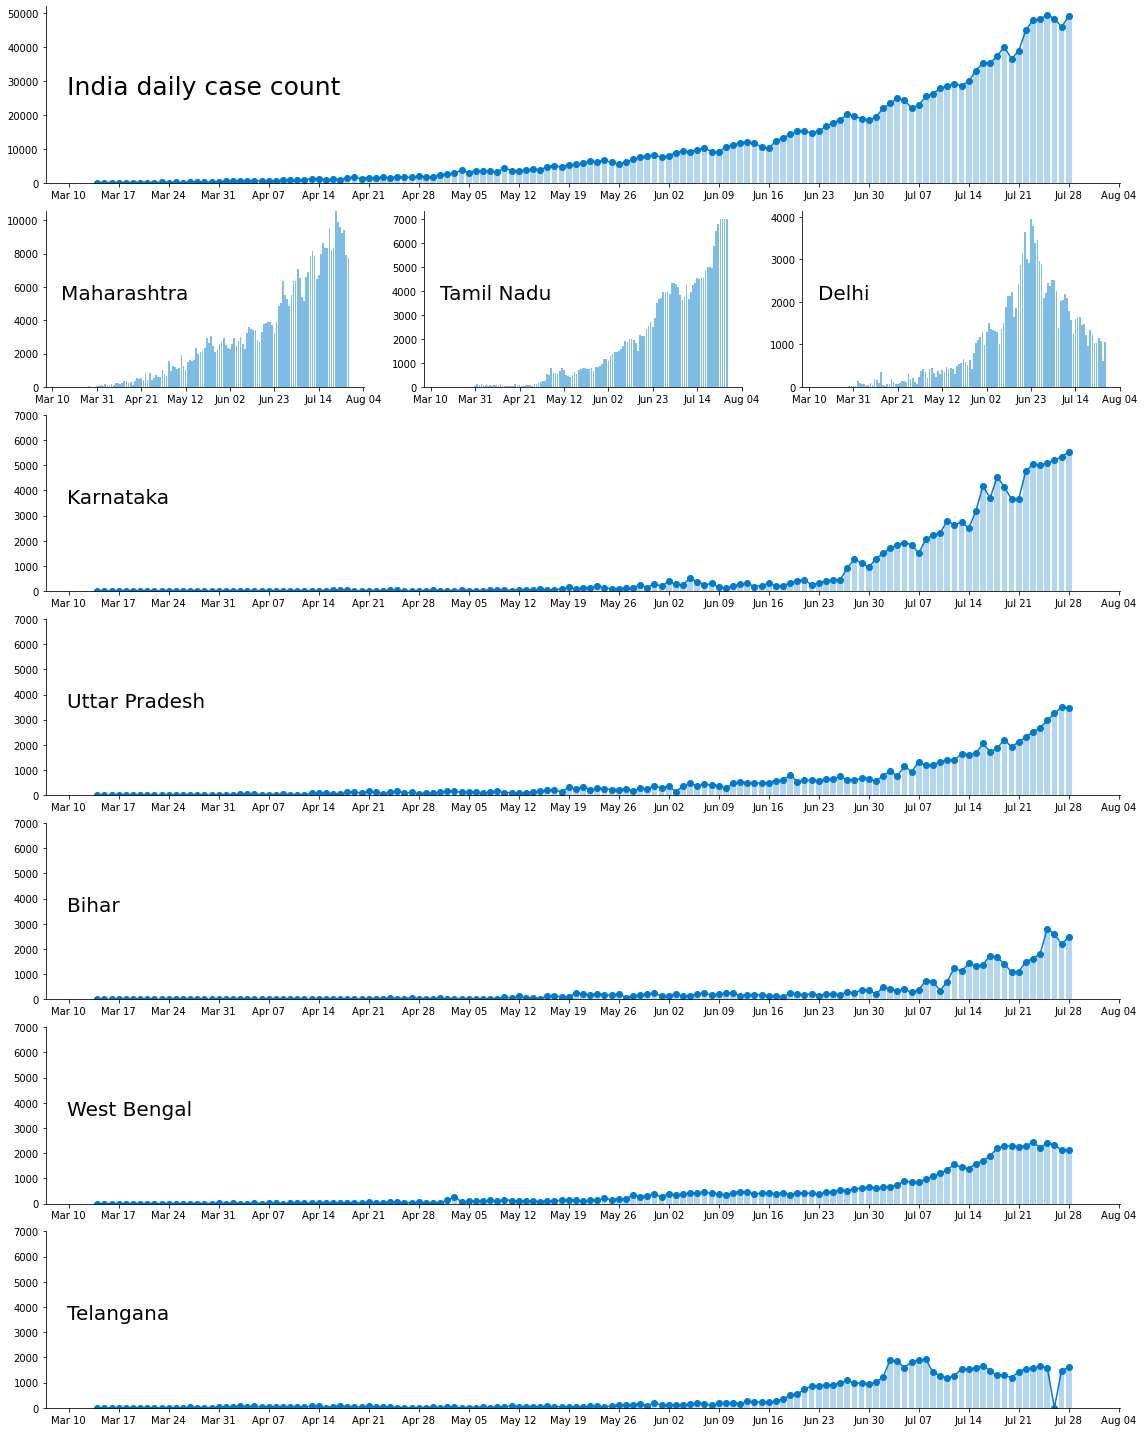

In [62]:
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



#### Print df_table

Finally print ```df_table``` to give a complete overview of cases and deaths 

In [191]:
print(df_table.to_string(index=False))

## 1.3 - Getting your dashboard on your blog

Now that you have your dashboard in python notebook, you will have to do the following to get it on your blog.

When you are done, it will look something like [this](http://gensectimes.com/BargainBlog/covid-overview-linde-matplotlib-exp/).

1. For the code cells you don't want to see, add ```#hide``` on top of the cell
2. For the code cells you only want to see the display and not the code, add ```#hide_input```
3. Add a title and [front matter](https://fastpages.fast.ai/fastpages/jupyter/2020/02/21/introducing-fastpages.html#Options-via-FrontMatter) to your .ipynb file in the first cell of your notebook (see fastpages sample notebook for example)..it might look like this

```markdown
# COVID-19 India Matplotlib Overview
> Tracking coronavirus total cases, deaths and new cases in India

- author: Hargun Oberoi
```

4. Copy the file to ```YEAR-MONTH-DATE-YuourExistingFilename.ipynb``` format in the _notebooks folder of your blog repo. Check [fastpages](https://fastpages.fast.ai/) for more information
5. For markdown cells like the ones you copied from here, there is no way to hide them. Delete them from the target notebook you created in the previous step
6. Push your updated repo to github (in the top level folder for the repository, do `git add .; git commit -m "commit message" -a; git push`)
7. Check if your site build has been successful on github actions

For questions on fastpages, refer [here](https://forums.fast.ai/t/fastpages-github-pages-blog-using-nbdev/62828)

## 1.4 OPTIONAL AND EXTRA CREDIT

Do far we have provided CSV files for the 27th and 28th of July. Fastpages uses github actions to build the blog, so your entire notebook is executed. If you want your dashboard to update every day, you'll need to

1. write code to fetch the latest day's csv file
2. change your existing code to figure the latest day instead of looking for the 28th (you might want to use `pd.DateTime`)
3. setup githib actions so that the notebook is run every day. Instructions [here](https://sanzgiri.github.io/jupyter/2020/04/15/fastpages-jupyter-notebooks.html)

Make sure you finish the needed parts firat and Question 2 before you start doing this part.